#I. Author: hsthe29
* github: https://github.com/hsthe29
* IT1-04 | K65-HUST

# IT3190 - Nhập môn học máy và khai phá dữ liệu
- Mã lớp: 136805 
- Kì học: 20221  
- Giảng viên hướng dẫn: Nguyễn Nhật Quang 
- Thành viên nhóm: 
 - Vũ Việt Bách - 20200061 
 - Nguyễn Minh Tuấn - 20204700 
 - Nguyễn Khánh An - 20200003 
 - Hồ Sỹ Thế - 20200614 

#II. Math background

##2.1 SVD
- Gọi ma trận $\mathbf{A}_{m×n}$, $rank\left(\mathbf{A}\right) = k$ là ma trận `Rating` với $m$ là số lượng user, $n$ là số lượng anime. Người dùng i rate cho anime j số điểm $a_{ij}$.
- SVD là phép phân tích ma trận $\mathbf{A}_{m×n}=\mathbf{U}_{m×m}\mathbf{S}_{m×n}\mathbf{V}_{n×n}^{T}$, trong đó $\mathbf{U}$ và $\mathbf{V}$ là ma trận trực giao, $\mathbf{S}$ là ma trận đường chéo.
- Xét tích 
  - $\mathbf{A}^T\mathbf{A} = \left(\mathbf{U}\mathbf{S}\mathbf{V}^T\right)^T\mathbf{U}\mathbf{S}\mathbf{V}^T = \mathbf{V}\mathbf{S}^T\mathbf{U}^T\mathbf{U}\mathbf{S}\mathbf{V}^T = \mathbf{V}\mathbf{S}^T\mathbf{S}\mathbf{V}^T ~~~~ (2.1.1)$
  - $\mathbf{A}\mathbf{A}^T = \mathbf{U}\mathbf{S}\mathbf{V}^T\left(\mathbf{U}\mathbf{S}\mathbf{V}^T\right)^T = \mathbf{U}\mathbf{S}\mathbf{V}^T\mathbf{V}\mathbf{S}^T\mathbf{U}^T = \mathbf{U}\mathbf{S}\mathbf{S}^T\mathbf{U}^T ~~~~ (2.1.2)$
- Giả sử rằng: $\mathbf{S}_{m×n}=
 \begin{pmatrix}
  σ_{1} & 0 & \cdots & 0 \\
  0 & \sigma_{2} & \cdots & 0 \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  0 & 0 & \cdots & 0
 \end{pmatrix} = diag(σ_{1}, σ_{2}, …, σ_{k}, 0, ..., 0)_{m×n}$
- Từ đó 
  - $\mathbf{A}^T\mathbf{A}$: $\mathbf{S}^T\mathbf{S} = diag(σ_{1}^{2}, σ_{2}^{2}, …, σ_{k}^{2}, 0, ..., 0)_{n×n}$. Do đó $σ_{1}^{2}, σ_{2}^{2}, …, σ_{k}^{2}$ là các trị riêng của $\mathbf{A}^\mathbf{T}\mathbf{A}$.
  - $\mathbf{A}\mathbf{A}^T$: $\mathbf{S}\mathbf{S}^T = diag(σ_{1}^{2}, σ_{2}^{2}, …, σ_{k}^{2}, 0, ..., 0)_{m×m}$. Do đó $σ_{1}^{2}, σ_{2}^{2}, …, σ_{k}^{2}$ là các trị riêng của $\mathbf{A}^\mathbf{T}\mathbf{A}$.

- Xét biểu thức (2.1.1): 
  - $\mathbf{A}^T\mathbf{A}$ là ma trận giữa các bộ anime mà các ô là tích vô hướng các vector rating của từng bộ anime.
  - $\mathbf{V}$ là các vector riêng, tức mỗi cột của $\mathbf{V}$ là một tính chất ẩn của bộ anime tương ứng, dựa vào đây ta có thể tìm được sự tương đồng giữa các bộ anime.

- Tương tự với biểu thức (2.1.2).
- Ma trận $\mathbf{S}$ mang thông tin độ mạnh của từng yếu tố của $\mathbf{U}$ và $\mathbf{V}$

##2.2 Advanced:

Tuy nhiên, việc tính SVD nguyên bản là khá tốn kém (space, time complexity: $O\left(\min(mn^2, nm^2)\right)$)) và phức tạp:

Vì vậy, ta dùng một cách đơn giản hơn. Đó là sẽ phân tích  $\mathbf{A}_{m×n}=\mathbf{P}_{m×r}\mathbf{Q}_{n×r}^{T}$

Bài toán xấp xỉ ma trận $\mathbf{A}_{m×n}$ bởi ma trận $\mathbf{X}_{m×n} = \mathbf{P}_{m×r}\mathbf{Q}_{n×r}^T$ có $rank = r$ được viết lại: $\mathbf{A}^*=\underset{\mathbf{X}}{\operatorname{argmin}} \left(||\mathbf{A}-\mathbf{X}||_F\right)$.

gọi ma trận $r_{m×n}: r_{ij} = 1$ nếu user i rate cho anime j và = 0 nếu ngược lại.

Xét $L = \frac{1}{2}||\mathbf{A}-\mathbf{P}\mathbf{Q}||_F^2$:
- $L(\mathbf{P}, \mathbf{Q}) = \frac{1}{2} \sum_{m} \sum_{n:r_{mn}=1} (a_{mn} - \mathbf{p}_{:m}\mathbf{q}_{:n}^T)^2 ~~~~~ (2.2.1)$

- Xếp hạng dự đoán cho $a_{mn}$ là $\hat{a}_{mn}=\mathbf{p}_{:m}\mathbf{q}_{:n}^T$

Áp dụng `L2 Regularization` ta được:
- $L(\mathbf{P}, \mathbf{Q}, \mathbf{bu},\mathbf{bi}) = \frac{1}{2}\sum_{m} \sum_{n:r_{mn}=1} (a_{mn} - \mathbf{p}_{:m}\mathbf{q}_{:n}^T )^2 + \frac{\lambda}{2} (||\mathbf{P}||_F^2 + ||\mathbf{Q}||_F^2) ~~~~~ (2.2.2)$

### Phương pháp tối ưu: Lần lượt cập nhật một biến trong khi cố định các biến khác

Xét 1 lượt đánh giá bởi user $u$ cho anime $i$ với số điểm là $a$, gọi số điểm dự đoán là $\hat{a}$.

Kí hiệu $\mathbf{p}_u = \mathbf{P}_{:u}$, $\mathbf{q}_i=\mathbf{Q}_{:i}$, theo công thức (2.2.2) ta có:
- $\hat{a} = \mathbf{p}_u\mathbf{q}_i^T$
- Ta có: $L\left(\mathbf{p}_u, \mathbf{q}_i\right)=\frac{1}{2}\left(a - \hat{a}\right)^2 + \frac{\lambda}{2}\left(||\mathbf{p}_u||_2^2 + ||\mathbf{q}_i||_2^2 \right) = \frac{1}{2}\left(a - \mathbf{p}_u\mathbf{q}_i^T\right)^2 + \frac{\lambda}{2}\left(||\mathbf{p}_u||_2^2 + ||\mathbf{q}_i||_2^2 \right)$
- $\frac{\partial L}{\partial \mathbf{p}_u} = -\left(a - \mathbf{p}_u\mathbf{q}_i^T\right)\mathbf{q}_i + \lambda \mathbf{p}_u$ 
- $\frac{\partial L}{\partial \mathbf{q}_{:n}} = -\left(a - \mathbf{p}_u\mathbf{q}_i^T\right)\mathbf{p}_u + \lambda \mathbf{q}_i$

Quy tắc cập nhật:
- $\mathbf{p}_u = \mathbf{p}_u + η\left(a - \mathbf{p}_u\mathbf{q}_i^T\right)\mathbf{q}_i + \lambda \mathbf{p}_u$ 
- $\mathbf{q}_i = \mathbf{q}_i + η\left(a - \mathbf{p}_u\mathbf{q}_i^T\right)\mathbf{p}_u + \lambda \mathbf{q}_i$

##2.3 Mở rộng từ **2.2**

- Xếp hạng dự đoán cho $a_{mn}$ là $\hat{a}_{mn}=\mathbf{p}_{:m}\mathbf{q}_{:n}^T$
- Tuy nhiên $\mathbf{p}_{:m}\mathbf{q}_{:n}^T$, chỉ ghi lại mối quan hệ giữa người dùng và item. Trên thực tế, xếp hạng được quan sát có thể bị ảnh hưởng bởi sở thích của người dùng hoặc đặc điểm của item. Nói cách khác, mối quan hệ giữa người dùng và item có thể được thay thế bằng thông tin sai lệch (vd tính thiên vị, nghiêm khắc, ...). Thông tin thiên vị về người dùng và vật phẩm có thể phản ánh sự thật của xếp hạng một cách khách quan hơn. Do đó, xếp hạng dự đoán được thay đổi thành:
 - $\hat{a}_{mn}=\mathbf{p}_{:m}\mathbf{q}_{:n}^T + μ + b_u + b_i$
- Trong đó $μ$ là xếp hạng trung bình tổng thể và $(b_u, b_i)$ cho biết độ lệch quan sát được của người dùng và item tương ứng.

Xét 1 lượt đánh giá bởi user $u$ cho anime $i$ với số điểm là $a$, gọi số điểm dự đoán là $\hat{a}$.

Kí hiệu $\mathbf{p}_u = \mathbf{P}_{:u}$, $\mathbf{q}_i=\mathbf{Q}_{:i}$, $b_u = \mathbf{bu}_u$, $b_i = \mathbf{bi}_i$, theo công thức (2) ta có:
- $\hat{a} = \mathbf{p}_u\mathbf{q}_i^T + μ + b_u + b_i ~~~~~~ (2.3.1)$
- Ta có: $L\left(\mathbf{p}_u, \mathbf{q}_i, b_u, b_i\right)=\frac{1}{2}\left(a - \hat{a}\right)^2 + \frac{\lambda}{2}\left(||\mathbf{p}_u||_2^2 + ||\mathbf{q}_i||_2^2 \right) = \frac{1}{2}\left(a - \mathbf{p}_u\mathbf{q}_i^T - μ - b_u - b_i\right)^2 + \frac{\lambda}{2}\left(||\mathbf{p}_u||_2^2 + ||\mathbf{q}_i||_2^2 \right)$
- $\frac{\partial L}{\partial \mathbf{p}_u} = -\left(a - \mathbf{p}_u\mathbf{q}_i^T - μ - b_u - b_i\right)\mathbf{q}_i + \lambda \mathbf{p}_u$ 
- $\frac{\partial L}{\partial \mathbf{q}_{:n}} = -\left(a - \mathbf{p}_u\mathbf{q}_i^T - μ - b_u - b_i\right)\mathbf{p}_u + \lambda \mathbf{q}_i$
- $\frac{\partial L}{\partial b_u} = -\left(a - \mathbf{p}_u\mathbf{q}_i^T - \mu
-b_u - b_i\right)$
- $\frac{\partial L}{\partial b_i} = -\left(a - \mathbf{p}_u\mathbf{q}_i^T - μ- b_u - b_i\right)$

Quy tắc cập nhật:
- $\mathbf{p}_u = \mathbf{p}_u + η\left(a - \mathbf{p}_u\mathbf{q}_i^T - μ - b_u - b_i\right)\mathbf{q}_i + \lambda \mathbf{p}_u ~~~~~~ (2.3.2)$ 
- $\mathbf{q}_i = \mathbf{q}_i + η\left(a - \mathbf{p}_u\mathbf{q}_i^T - μ - b_u - b_i\right)\mathbf{p}_u + \lambda \mathbf{q}_i ~~~~~~ (2.3.3)$
- $b_u = b_u + η\left(a - \mathbf{p}_u\mathbf{q}_i^T - μ - b_u - b_i\right) ~~~~~~ (2.3.4)$
- $b_i = b_i + η\left(a - \mathbf{p}_u\mathbf{q}_i^T - μ - b_u - b_i\right) ~~~~~~ (2.3.5)$

#III. Implementation (Algorithm **2.3** - SVD based)

**Input:**
- $\mathbf{A}_{m×n}$ – ma trận "user-item"
- $d$ – số lượng latent factors
- $λ$ – tham số `regularization` của hàm mục tiêu
- $k$ – số lượng vòng lặp (epochs)
- $𝛆$ – min_delta (điều kiện dừng)

**Output:** ma trận $\mathbf{P}$, $\mathbf{Q}$ và $\mathbf{bu}$, $\mathbf{bi}$

**Thuật toán:**
- (1): Khởi tạo ngẫu nhiên $\mathbf{P}$, $\mathbf{Q}$, $\mathbf{bu}$, $\mathbf{bi}$, t = 0
- (2): Tính xếp hạng dự đoán theo công thức (2.3.1)
- (3): Cập nhật $\mathbf{P}^{(t)}$, $\mathbf{Q}^{(t)}$, $\mathbf{bu}^{(t)}$, $\mathbf{bi}^{(t)}$ theo công thức (2.3.2) - (2.3.5)
- (4): $e^{(t)} = L(\mathbf{P}^{(t)}, \mathbf{Q}^{(t)}, \mathbf{bu}^{(t)}, \mathbf{bi}^{(t)})$ 
- (5): if $∑_{s=0}^{\text{w_size}}e^{(t-s)} < ∑_{s=0}^{\text{w_size}}e^{(t-\text{w_size}-  s)}$ thì dừng, nếu không: $t = t + 1$ và quay lại bước (2).



In [1]:
import numpy as np
from numba import njit, prange
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.sparse import coo_matrix
import numba
import time
from functools import wraps
from math import trunc
from sklearn.metrics import mean_absolute_error, mean_squared_error,\
    mean_absolute_percentage_error, r2_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')

%cd drive/MyDrive/ML_class_proj/processed_data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/1i0H6zMhMZWyNmMpsgrDiWXqTH8q7pmvn/ML_class_proj/processed_data


# Dataset

In [ ]:
u_a_df = pd.read_csv('train_set.csv')
test_df = pd.read_csv('test_set.csv')
u_df = pd.read_csv('users.csv')
a_df = pd.read_csv('anime.csv')

In [ ]:
N_USERS = u_df.shape[0]
N_ANIMES = a_df.shape[0]

In [ ]:
N_USERS, N_ANIMES

(108711, 6668)

In [ ]:
train = u_a_df[["anime_id", "user_id", "my_score"]]
test = test_df[["anime_id", "user_id", "my_score"]]
train.columns = ['i_id', 'u_id', 'rating']
test.columns = ['i_id', 'u_id', 'rating']

# Utils

In [11]:
def get_version():
    return '1.0.0-final'


def _timer(text=''):
    def decorator(func):
        @wraps(func)
        def wrapper(*args, **kwargs):
            start = time.perf_counter()
            result = func(*args, **kwargs)
            end = time.perf_counter()
            hours = trunc((end - start) / 3600)
            minutes = trunc((end - start) / 60)
            seconds = round((end - start) % 60)

            if hours > 1:
                print(text + '{} hours {} min and {} sec'.format(hours,
                                                                 minutes,
                                                                 seconds))
            elif hours == 1:
                print(text + '{} hour {} min and {} sec'.format(hours, minutes,
                                                                seconds))
            elif minutes >= 1:
                print(text + '{} min and {} sec'.format(minutes, seconds))
            else:
                print(text + '{} sec'.format(seconds))

            return result
        return wrapper
    return decorator

# Fast methods

In [5]:
# numba jit compiler

@njit
def _shuffle(X):
    np.random.shuffle(X)
    return X

@njit
def _initialization(n_users, n_items, n_factors):
    bu = np.zeros(n_users)
    bi = np.zeros(n_items)
    P = np.random.normal(0, .1, (n_users, n_factors))
    Q = np.random.normal(0, .1, (n_items, n_factors))

    return bu, bi, P, Q

@njit
def _run_epoch_batch(X, bu, bi, P, Q, global_mean, n_factors, lr, reg, batch_size=100):
    iterations = X.shape[0] // batch_size
    if(X.shape[0]%batch_size) != 0:
        iterations += 1
    mask = np.arange(X.shape[0])
    np.random.shuffle(mask)
    for i in range(iterations):
        indices = mask[i*batch_size:min((i+1)*batch_size, X.shape[0])]
        users, items, ratings = X[indices, 0].astype(np.int32), X[indices, 1].astype(np.int32), X[indices, 2]
        pu = P[users]
        qi = Q[items]
        # Predict current rating
        preds = global_mean + bu[users] + bi[items]

        preds += np.sum(pu*qi, axis=1)

        err = ratings - preds

        # Update biases
        bu[users] += lr * (err - 0*reg * bu[users])
        bi[items] += lr * (err - 0*reg * bi[items])
        # Update latent factors
        err = err.reshape(-1, 1)
        P[users] += lr*(err*qi - reg*pu)
        Q[items] += lr*(err*pu - reg*qi)

    return bu, bi, P, Q

@njit
def _run_epoch_sgd(X, bu, bi, P, Q, global_mean, n_factors, lr, reg):
    for i in range(X.shape[0]):
        user, item, rating = int(X[i, 0]), int(X[i, 1]), X[i, 2]

        # Predict current rating
        pred = global_mean + bu[user] + bi[item]

        for factor in range(n_factors):
            pred += P[user, factor] * Q[item, factor]

        err = rating - pred

        # Update biases
        bu[user] += lr * (err - 0*reg * bu[user])
        bi[item] += lr * (err - 0*reg * bi[item])

        # Update latent factors
        for factor in range(n_factors):
            puf = P[user, factor]
            qif = Q[item, factor]

            P[user, factor] += lr * (err * qif - reg * puf)
            Q[item, factor] += lr * (err * puf - reg * qif)

    return bu, bi, P, Q

@njit
def _compute_loss(X, bu, bi, P, Q, global_mean, reg, n_factors):
    loss = 0
    for i in range(X.shape[0]):
        user, item, rating = int(X[i, 0]), int(X[i, 1]), X[i, 2]
        sp = 0
        sq = 0
        pred = global_mean + bu[user] + bi[item]

        for factor in range(n_factors):
            puf = P[user, factor]
            qif = Q[item, factor]
            pred += puf*qif
            sp += puf*puf
            sq = qif*qif

        err = rating - pred
               
        loss += err*err + reg*(sp+sq)

    return 0.5*loss

@njit
def _compute_train_metrics(X, bu, bi, P, Q, global_mean, n_factors):
    diffs = []
    for i in range(X.shape[0]):
        user, item, rating = int(X[i, 0]), int(X[i, 1]), X[i, 2]
        pred = global_mean

        if user > -1:
            pred += bu[user]

        if item > -1:
            pred += bi[item]

        if (user > -1) and (item > -1):
            for factor in range(n_factors):
                pred += P[user, factor] * Q[item, factor]

        diffs.append(rating - pred)

    diffs = np.array(diffs)
    loss = np.square(diffs).mean()

    return loss

@njit
def _compute_val_metrics(X_val, bu, bi, P, Q, global_mean, n_factors):
    diffs = []
    for i in range(X_val.shape[0]):
        user, item, rating = int(X_val[i, 0]), int(X_val[i, 1]), X_val[i, 2]
        pred = global_mean

        if user > -1:
            pred += bu[user]

        if item > -1:
            pred += bi[item]

        if (user > -1) and (item > -1):
            for factor in range(n_factors):
                pred += P[user, factor] * Q[item, factor]

        diffs.append(rating - pred)

    diffs = np.array(diffs)
    loss = np.square(diffs).mean()
    rmse = np.sqrt(loss)
    mae = np.absolute(diffs).mean()

    return loss, rmse, mae

@njit
def normalize(y_pred, min_rating, max_rating):
    res = np.zeros_like(y_pred)
    for i in prange(y_pred.shape[0]):
        if y_pred[i] > max_rating:
            y_pred[i] = max_rating
        if y_pred[i] < min_rating:
            y_pred[i] = min_rating
        res[i] = round(y_pred[i], 0)

    return res


In [6]:
def preprocess_data(X, test, val_ratio=0.2):       
    print('Preprocessing ...\n')
    val_size = int(X.shape[0]*val_ratio) if val_ratio < 1 else val_ratio
    select_idices = np.random.choice(X.shape[0], val_size)
    mask = np.ones(X.shape[0], dtype=bool)
    mask[select_idices] = False
    
    X_val = (X.iloc[select_idices]).copy()
    X = (X.iloc[mask]).copy()
    test = test.copy()

    user_ids = X['u_id'].unique().tolist()
    item_ids = X['i_id'].unique().tolist()

    n_users = len(user_ids)
    n_items = len(item_ids)

    user_idx = range(n_users)
    item_idx = range(n_items)

    user_mapping_ = dict(zip(user_ids, user_idx))
    item_mapping_ = dict(zip(item_ids, item_idx))
    #
    X['u_id'] = X['u_id'].map(user_mapping_)
    X['i_id'] = X['i_id'].map(item_mapping_)
    #
    X_val['u_id'] = X_val['u_id'].map(user_mapping_)
    X_val['i_id'] = X_val['i_id'].map(item_mapping_)
    #
    test['u_id'] = test['u_id'].map(user_mapping_)
    test['i_id'] = test['i_id'].map(item_mapping_)

    X_val.fillna(-1, inplace=True)
    test.fillna(-1, inplace=True)

    X['u_id'] = X['u_id'].astype(np.int32)
    X['i_id'] = X['i_id'].astype(np.int32)
    X_val['u_id'] = X_val['u_id'].astype(np.int32)
    X_val['i_id'] = X_val['i_id'].astype(np.int32)
    test['u_id'] = test['u_id'].astype(np.int32)
    test['i_id'] = test['i_id'].astype(np.int32)

    ret_X = X[['u_id', 'i_id', 'rating']].values
    ret_Val = X_val[['u_id', 'i_id', 'rating']].values
    ret_test = test[['u_id', 'i_id', 'rating']].values

    del X
    del X_val
    del test

    print("Occupied memory:")
    print("    ---> Train:      ", round(ret_X.size*ret_X.itemsize/(1<<30), 3), "GB")
    print("    ---> Validation: ", round(ret_Val.size*ret_Val.itemsize/(1<<30), 3), "GB")
    print("    ---> Test:       ", round(ret_test.size*ret_test.itemsize/(1<<30), 3), "GB")

    return ret_X, ret_Val, ret_test

# SVD Core

In [ ]:
# SVD class

class SVD:

    def __init__(self, lr=.005, reg=.02, n_epochs=20, n_factors=100,
                 early_stopping=False, shuffle=False, min_delta=.001,
                 min_rating=1, max_rating=10):

        self.lr = lr
        self.reg = reg
        self.n_epochs = n_epochs
        self.n_factors = n_factors
        self.early_stopping = early_stopping
        self.shuffle = shuffle
        self.min_delta = min_delta
        self.min_rating = min_rating
        self.max_rating = max_rating

    @_timer(text='\nTraining took ')
    def fit(self, X: pd.DataFrame, X_val: pd.DataFrame=None, method='sgd'):
        if self.early_stopping:
          self._chek_current = 0
          self._chek_last = 1e6

        if X_val is not None:
            self._init_metrics()

        self.global_mean_ = np.mean(X[:, 2])
        if method == 'sgd':
          history, train_mse, val_mse = self._run_sgd(X, X_val)
        elif method == 'batch':
          history, train_mse, val_mse = self._run_mini_batch(X, X_val)
        else:
          raise KeyError(f'\'{method}\' currently not supported')

        return pd.DataFrame(data={
            'epoch': np.arange(len(history)),
            'l2-regularization loss': history,
            'train-mse': train_mse,
            'val-mse': val_mse})

    def _init_metrics(self):
        metrics = np.zeros((self.n_epochs, 3), dtype=float)
        self.metrics_ = pd.DataFrame(metrics, columns=['Loss', 'RMSE', 'MAE'])

    def _run_mini_batch(self, X, X_val):
        n_users = len(np.unique(X[:, 0]))
        n_items = len(np.unique(X[:, 1]))

        bu, bi, P, Q = _initialization(n_users, n_items, self.n_factors)
        
        hist = []
        hist_mse = []

        # Run mini-batch
        for ep in range(self.n_epochs):
            start = self._on_epoch_begin(ep)

            if self.shuffle:
                X = _shuffle(X)

            bu, bi, P, Q = _run_epoch_batch(X, bu, bi, P, Q, self.global_mean_,
                                        self.n_factors, self.lr, self.reg)
            
            loss = _compute_loss(X, bu, bi, P, Q,
                                 self.global_mean_,
                                 self.reg,
                                 self.n_factors)
            hist.append(loss)
            hist_mse.append(_compute_train_metrics(X, bu, bi, P, Q,
                                                     self.global_mean_,
                                                     self.n_factors))

            if X_val is not None:
                self.metrics_.loc[ep, :] = _compute_val_metrics(
                                                     X_val, bu, bi, P, Q,
                                                     self.global_mean_,
                                                     self.n_factors
                                                 )
                self._on_epoch_end(start, loss,
                                   self.metrics_.loc[ep, 'Loss'],
                                   self.metrics_.loc[ep, 'RMSE'],
                                   self.metrics_.loc[ep, 'MAE'])

                if self.early_stopping:
                    val_rmse = self.metrics_['RMSE'].tolist()
                    if self._early_stopping(val_rmse, ep,
                                            self.min_delta):
                        break

            else:
                self._on_epoch_end(start, loss)

        self.bu_ = bu
        self.bi_ = bi
        self.P_ = P
        self.Q_ = Q
        
        return hist, hist_mse, self.metrics_[:len(hist)]['Loss' ].values

    def _run_sgd(self, X, X_val):
        n_users = len(np.unique(X[:, 0]))
        n_items = len(np.unique(X[:, 1]))

        bu, bi, P, Q = _initialization(n_users, n_items, self.n_factors)
        hist = []
        hist_mse = []

        # Run SGD
        for epoch_ix in range(self.n_epochs):
            start = self._on_epoch_begin(epoch_ix)

            if self.shuffle:
                X = _shuffle(X)

            bu, bi, P, Q = _run_epoch_sgd(X, bu, bi, P, Q, self.global_mean_,
                                        self.n_factors, self.lr, self.reg)
            
            loss = _compute_loss(X, bu, bi, P, Q,
                                 self.global_mean_,
                                 self.reg,
                                 self.n_factors)
            hist.append(loss)
            hist_mse.append(_compute_train_metrics(X, bu, bi, P, Q,
                                                     self.global_mean_,
                                                     self.n_factors))

            if X_val is not None:
                self.metrics_.loc[epoch_ix, :] = _compute_val_metrics(
                                                     X_val, bu, bi, P, Q,
                                                     self.global_mean_,
                                                     self.n_factors
                                                 )
                self._on_epoch_end(start, loss,
                                   self.metrics_.loc[epoch_ix, 'Loss'],
                                   self.metrics_.loc[epoch_ix, 'RMSE'],
                                   self.metrics_.loc[epoch_ix, 'MAE'])

                if self.early_stopping:
                    val_rmse = self.metrics_['RMSE'].tolist()
                    if self._early_stopping(val_rmse, epoch_ix,
                                            self.min_delta):
                        break

            else:
                self._on_epoch_end(start, loss)

        self.bu_ = bu
        self.bi_ = bi
        self.P_ = P
        self.Q_ = Q
        return hist, hist_mse, self.metrics_[:len(hist)]['Loss' ].values

    def predict(self, X, clip=True):
        preds = [0.]*X.shape[0]

        for i in range(X.shape[0]):
            user_known, item_known = False, False
            pred = self.global_mean_

            if int(X[i, 0]) > -1:
                user_known = True
                pred += self.bu_[int(X[i, 0])]

            if int(X[i, 1]) > -1:
                item_known = True
                pred += self.bi_[int(X[i, 1])]

            if user_known and item_known:
                pred += np.dot(self.P_[int(X[i, 0])], self.Q_[int(X[i, 1])])

            if clip:
                pred = self.max_rating if pred > self.max_rating else pred
                pred = self.min_rating if pred < self.min_rating else pred

            preds[i] = pred

        return np.asarray(preds)

    def _early_stopping(self, val_rmse, ep, min_delta):
        if (ep+1)%5 == 0:
            # if val_rmse[epoch_idx] + min_delta > val_rmse[epoch_idx-1]:
            if self._chek_current + min_delta > self._chek_last:
                # self.metrics_ = self.metrics_.loc[:(ep-2), :]
                return True
            self._chek_last = self._chek_current
            self._chek_current = 0
            
        else:
            self._chek_current += val_rmse[ep]

        return False

    def _on_epoch_begin(self, ep):
        start = time.perf_counter()
        if ep < 9:
          end = '   |  '
        elif ep < 99:
          end = '  |  '
        else:
          end = ' |  '
        print('Epoch {}/{}'.format(ep + 1, self.n_epochs), end=end)

        return start

    def _on_epoch_end(self, start, loss, val_loss=None, val_rmse=None, val_mae=None):
        """Displays epoch ending log.
        """
        end = time.perf_counter()

        print(f'training loss: {loss:4.3f}', end='  |  ')

        if val_loss is not None:
            print(f'val_loss: {val_loss:4.3f}', end='  |  ')
            print(f'val_rmse: {val_rmse:4.3f}', end='  |  ')
            print(f'val_mae: {val_mae:4.3f}', end='  |  ')

        print(f'took {end - start:.3f} sec')

# Run

In [ ]:
loaded = False

In [ ]:
# Load and preprocess data

if not loaded:
  train_inp, val_inp, test_inp = preprocess_data(train, test, val_ratio=20000)
  loaded = True


Preprocessing ...

Occupied memory:
    ---> Train:       0.379 GB
    ---> Validation:  0.0 GB
    ---> Test:        0.051 GB


In [ ]:
# Load model

svd = SVD(lr=0.0005, reg=0.05, n_epochs=500, n_factors=50, early_stopping=True,
          shuffle=False, min_rating=1, max_rating=10, min_delta=0.0001)

In [ ]:
history = svd.fit(X=train_inp, X_val=val_inp, method='sgd')

Epoch 1/500   |  training loss: 19092572.156  |  val_loss: 2.199  |  val_rmse: 1.483  |  val_mae: 1.132  |  took 15.506 sec
Epoch 2/500   |  training loss: 17724529.728  |  val_loss: 2.048  |  val_rmse: 1.431  |  val_mae: 1.090  |  took 8.936 sec
Epoch 3/500   |  training loss: 16910945.991  |  val_loss: 1.958  |  val_rmse: 1.399  |  val_mae: 1.064  |  took 6.650 sec
Epoch 4/500   |  training loss: 16360033.927  |  val_loss: 1.898  |  val_rmse: 1.378  |  val_mae: 1.046  |  took 6.704 sec
Epoch 5/500   |  training loss: 15961807.863  |  val_loss: 1.854  |  val_rmse: 1.362  |  val_mae: 1.033  |  took 8.310 sec
Epoch 6/500   |  training loss: 15661142.230  |  val_loss: 1.821  |  val_rmse: 1.349  |  val_mae: 1.023  |  took 6.686 sec
Epoch 7/500   |  training loss: 15426572.048  |  val_loss: 1.795  |  val_rmse: 1.340  |  val_mae: 1.015  |  took 6.701 sec
Epoch 8/500   |  training loss: 15238617.361  |  val_loss: 1.775  |  val_rmse: 1.332  |  val_mae: 1.008  |  took 6.734 sec
Epoch 9/500   |

In [ ]:
pred = svd.predict(test_inp, clip=False)
rmse = np.sqrt(mean_squared_error(test_inp[:, 2], pred))
mae = mean_absolute_error(test_inp[:, 2], pred)

print(f'Test MAE: {mae:.3f}')
print(f'Test RMSE: {rmse:.3f}')

Test MAE: 0.853
Test RMSE: 1.149


In [12]:
# Kết quả dự đoán đã lưu vào tệp 'predict_The.csv'

save_df = pd.read_csv('predict_The.csv')

In [8]:
save_df

,i_id,u_id,rating,predicted
0,1,1227033,3,8.588545
1,1,3891667,10,10.279168
2,1,417835,5,7.848932
3,1,207589,10,8.587275
4,1,2835819,9,7.688177
...,...,...,...,...
2299421,5681,7249032,7,8.254513
2299422,34599,7249032,9,8.570609
2299423,20,7249032,8,8.106166
2299424,22319,7249032,7,7.559744


In [9]:
'''
Checkpoint:
- params
svd = SVD(lr=0.0005, reg=0.05, n_epochs=500, n_factors=50, early_stopping=True,
           shuffle=False, min_rating=1, max_rating=10, min_delta=0.0001)

- result
Training took 47 min and 49 sec
Test MAE: 0.851
Test RMSE: 1.148
'''

'\nCheckpoint:\n- params\nsvd = SVD(lr=0.0005, reg=0.05, n_epochs=500, n_factors=50, early_stopping=True,\n           shuffle=False, min_rating=1, max_rating=10, min_delta=0.0001)\n\n- result\nTraining took 47 min and 49 sec\nTest MAE: 0.851\nTest RMSE: 1.148\n'

Text(0, 0.5, 'loss')

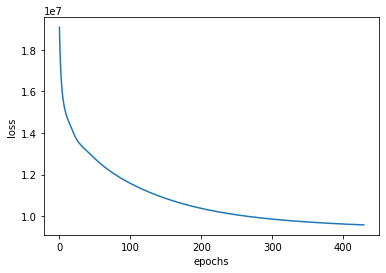

In [ ]:
plt.plot(history['epoch'], history['l2-regularization loss'])
plt.xlabel("epochs")
plt.ylabel("loss")

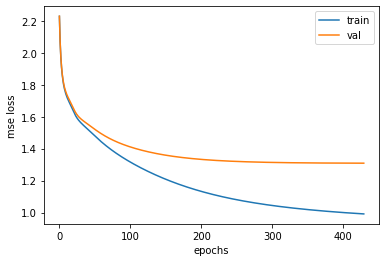

In [ ]:
plt.plot(history['epoch'], history['train-mse'], label='train')
plt.plot(history['epoch'], history['val-mse'], label='val')
plt.xlabel("epochs")
plt.ylabel("mse loss")
plt.legend()

# IV. Thống kê kết quả

In [13]:
ground_truth = save_df['rating'].values
pred_raw = save_df['predicted'].values

## Với số điểm dự đoán thô

In [20]:
mse = mean_squared_error(ground_truth, pred_raw)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ground_truth, pred_raw)
mape = mean_absolute_percentage_error(ground_truth, pred_raw)
r2 = r2_score(ground_truth, pred_raw)

print(f'Result MAE  : {mae:.3f}')
print(f'Result MSE  : {mse:.3f}')
print(f'Result RMSE : {rmse:.3f}')
print(f'Result MAPE : {mape:.3f}')
print(f'Result R2   : {r2:.3f}')

Result MAE  : 0.851
Result MSE  : 1.319
Result RMSE : 1.148
Result MAPE : 0.147
Result R2   : 0.546


In [25]:
print(f'''
Ground truth: Mean score: {ground_truth.mean()}
              Standard deviation: {ground_truth.std()}
''')

print(f'''
Predicted   : Mean score: {pred_raw.mean()}
              Standard deviation: {pred_raw.std()}
''')


Ground truth: Mean score: 7.590891378978927
              Standard deviation: 1.704881327458936


Predicted   : Mean score: 7.585444349256386
              Standard deviation: 1.2405114624451021



## Chuẩn hóa số điểm dự đoán

In [39]:
pred_normalized = normalize(pred_raw, 1, 10)

In [21]:
mse = mean_squared_error(ground_truth, pred_normalized)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ground_truth, pred_normalized)
mape = mean_absolute_percentage_error(ground_truth, pred_normalized)
r2 = r2_score(ground_truth, pred_normalized)

print(f'Result MAE  : {mae:.3f}')
print(f'Result MSE  : {mse:.3f}')
print(f'Result RMSE : {rmse:.3f}')
print(f'Result MAPE : {mape:.3f}')
print(f'Result R2   : {r2:.3f}')

Result MAE  : 0.815
Result MSE  : 1.401
Result RMSE : 1.184
Result MAPE : 0.142
Result R2   : 0.518


In [26]:
print(f'''
Ground truth: Mean score: {ground_truth.mean()}
              Standard deviation: {ground_truth.std()}
''')

print(f'''
Predicted   : Mean score: {pred_normalized.mean()}
              Standard deviation: {pred_normalized.std()}
''')


Ground truth: Mean score: 7.590891378978927
              Standard deviation: 1.704881327458936


Predicted   : Mean score: 7.587000842819034
              Standard deviation: 1.2763989707698338



In [34]:
pred_normalized[np.where(ground_truth == 1)[0]]

array([3., 8., 9., ..., 5., 7., 6.])

In [41]:
def get_acc(y_true, y_pred, delta = 0):
  N = len(y_true)
  cnt = 0
  for i in range(N):
    if np.abs(y_true[i] - y_pred[i]) <= delta:
      cnt += 1
  return cnt/N

def get_mae_by_score(y_true, y_pred):
  data = []
  for i in range(1, 11):
    indices = np.where(y_true == i)
    temp = y_true[indices] - y_pred[indices]
    data.append((i, np.mean(np.abs(temp))))
  return data


In [37]:
for d in range(3):
  print(f'diff: {d}, accuracy: {round(get_acc(ground_truth, pred_normalized, d)*100, 2)}%')

diff: 0, accuracy: 39.6%
diff: 1, accuracy: 84.35%
diff: 2, accuracy: 96.26%


In [42]:
data = get_mae_by_score(ground_truth, pred_normalized)
print('Score \t MAE')
for (score, mae) in data:
  print(f"{score: 2} \t {round(mae, 3)}")

Score 	 MAE
 1 	 3.388
 2 	 2.803
 3 	 2.187
 4 	 1.762
 5 	 1.285
 6 	 0.892
 7 	 0.609
 8 	 0.517
 9 	 0.736
 10 	 1.07


In [43]:
def plot_score(y_true, y_pred, size=500):
  plt.figure(figsize=(18, 6))
  indices = np.arange(size)
  plt.plot(indices, y_true[:size], label='ground_truth')
  plt.plot(indices, y_pred[:size], label='predicted')

  plt.legend()
  plt.show()


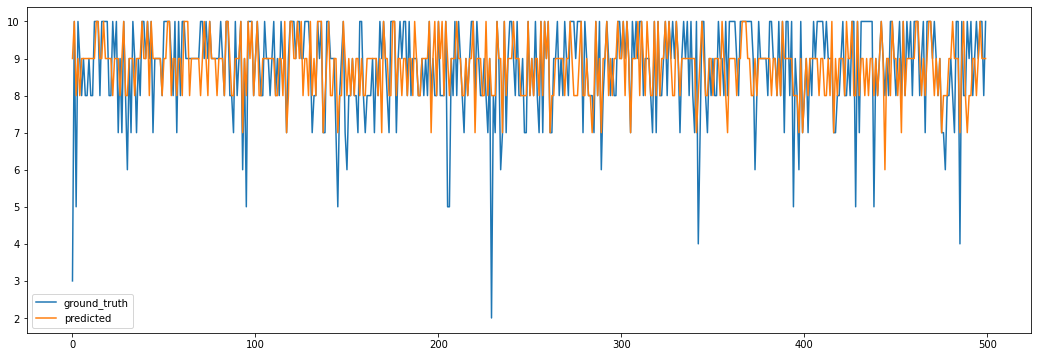

In [44]:
plot_score(ground_truth, pred_normalized)


___